In [66]:
import os
import matplotlib.pyplot
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf

import sklearn 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# See pred

In [67]:
model_names = os.listdir("experiments_results/no_validation")
model_names

['2025-06-25_07-58__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True',
 '2025-06-25_05-01__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False',
 '2025-06-25_02-17__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False',
 '2025-06-27_23-15__3NN_3ExpNN_mean',
 '2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val',
 '2025-06-27_13-02__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True_sim-Zeros',
 '2025-06-25_03-29__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-False',
 '2025-06-25_06-09__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-False',
 '2025-06-25_07-05__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True',
 '2025-06-25_01-10__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-False_amp-liking-True']

In [68]:
pd.read_csv("experiments_results/no_validation/2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val/raw/participant_15/graph_0/model_params_trained.csv",index_col=0)

,src_content_0,att_src_edge_0,src_edge_0,full_src_edge_0,dst_content_0,att_dst_edge_0,dst_edge_0,full_dst_edge_0,att_edge_0,edge_0,full_edge_0,bias_0
0,0.861218,1.0,1.016936,1.016936,NaN,1.0,NaN,NaN,1.0,0.310336,0.310336,-1.533535


In [69]:
model_name = "2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val"
# model_name = "2025-06-23_00-58__GAT_liking_sim_amp_3NN_3ExpNN"
participant_id = 26
graph_id = 0
raw_folder_path = os.path.join("experiments_results/no_validation",model_name,"raw")
pred_table_path = os.path.join(raw_folder_path,f"participant_{participant_id}",f"graph_{graph_id}","prediction_table.csv")
print(pred_table_path)

pred_table = pd.read_csv(pred_table_path,index_col = 0)
pred_table.head()

experiments_results/no_validation/2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val/raw/participant_26/graph_0/prediction_table.csv


,pred_values,true_values,train_mask,val_mask
0,-1.026939,0.030251,True,False
1,-1.009157,-0.877266,True,False
2,-0.363007,-0.363007,False,False
3,1.119270,1.119270,False,False
4,-1.004843,-1.512527,True,False


In [70]:
(pred_table[pred_table["train_mask"]]["pred_values"] - pred_table[pred_table["train_mask"]]["true_values"]).abs().mean()

0.6124081332

In [71]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = [pred_table[pred_table["train_mask"]+pred_table["val_mask"]]["true_values"].min(),pred_table[pred_table["train_mask"]+pred_table["val_mask"]]["true_values"].max()],
               y = [pred_table[pred_table["train_mask"]+pred_table["val_mask"]]["true_values"].min(),pred_table[pred_table["train_mask"]+pred_table["val_mask"]]["true_values"].max()],
               name = "truth",
               mode = "lines")
)

fig.add_trace(
    go.Scatter(x = pred_table[pred_table["train_mask"]]["true_values"],
               y = pred_table[pred_table["train_mask"]]["pred_values"],
               name = "training",
               mode = "markers")
)

fig.add_trace(
    go.Scatter(x = pred_table[pred_table["val_mask"]]["true_values"],
               y = pred_table[pred_table["val_mask"]]["pred_values"],
               name = "validation",
               mode = "markers")
)



fig

In [72]:
pred_table[pred_table["val_mask"]]["pred_values"].std(), pred_table[pred_table["val_mask"]]["true_values"].std()

(nan, nan)

# History

20 0


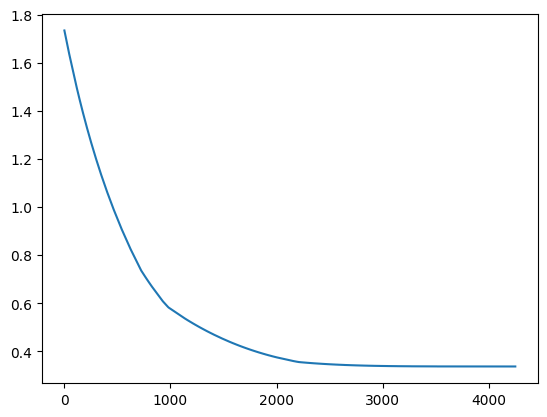

In [73]:
history_path = os.path.join(raw_folder_path,f"participant_{29}",f"graph_{graph_id}","history.csv")
history = pd.read_csv(history_path,index_col = 0)
history

plt.plot([float(x[len("tensor("):-1]) for x in history["train_mae"]])
plt.plot([float(x[len("tensor("):-1]) for x in history["val_mae"]])

print(pred_table["train_mask"].sum(),pred_table["val_mask"].sum())

# Clustering for depression

In [74]:
model_name = "2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val"
participant_id = 1
graph_id = 0

processed_folder_path = os.path.join("experiments_results/no_validation",model_name,"processed")
overall_summaries_path = os.path.join(processed_folder_path,"overall_summaries.csv")
print(overall_summaries_path)

overall_summaries = pd.read_csv(overall_summaries_path,index_col = 0)
overall_summaries.head()

experiments_results/no_validation/2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val/processed/overall_summaries.csv


,model.device,model.n_free_params,model.update_node_module.name,model.update_node_module.parameters.add_self_loops,model.update_node_module.parameters.bias,model.update_node_module.parameters.concat,model.update_node_module.parameters.dropout,model.update_node_module.parameters.dst_content_mask.0,model.update_node_module.parameters.dst_content_require_grad,model.update_node_module.parameters.dst_content_weight_initializer,...,src_edge_0_trained,full_src_edge_0_trained,dst_content_0_trained,att_dst_edge_0_trained,dst_edge_0_trained,full_dst_edge_0_trained,att_edge_0_trained,edge_0_trained,full_edge_0_trained,bias_0_trained
0,cuda,4,MyGATConv,False,True,True,0.0,False,True,glorot,...,0.263365,0.263365,NaN,1.0,NaN,NaN,1.0,1.967580,1.967580,-0.608210
1,cuda,4,MyGATConv,False,True,True,0.0,False,True,glorot,...,-0.841104,-0.841104,NaN,1.0,NaN,NaN,1.0,0.491972,0.491972,0.140942
2,cuda,4,MyGATConv,False,True,True,0.0,False,True,glorot,...,-0.481252,-0.481252,NaN,1.0,NaN,NaN,1.0,2.082179,2.082179,-0.637914
3,cuda,4,MyGATConv,False,True,True,0.0,False,True,glorot,...,-1.187043,-1.187043,NaN,1.0,NaN,NaN,1.0,0.161951,0.161951,-0.250646
4,cuda,4,MyGATConv,False,True,True,0.0,False,True,glorot,...,-0.847369,-0.847369,NaN,1.0,NaN,NaN,1.0,-0.066702,-0.066702,-1.025425


In [75]:
folder_path = f"experiments_results/no_validation/{model_name}/processed"
overall_summaries = pd.read_csv(os.path.join(folder_path,"overall_summaries.csv"),index_col=0)
overall_summaries["participant_id"] = overall_summaries["participant_folder_name"].apply(lambda x: int(x.split("_")[1]))

participant_data = pd.read_csv("data/processed/participant_data.csv",index_col=0)
participant_data["participant_id"] = participant_data["participant"]
participant_data.drop(["participant"],axis=1,inplace=True)
participant_data

data = pd.merge(participant_data,overall_summaries,on="participant_id",how="right")
data[["participant_id","depression","depressionCont","src_edge_0_trained", "src_content_0_trained", "edge_0_trained", "bias_0_trained"]]

,participant_id,depression,depressionCont,src_edge_0_trained,src_content_0_trained,edge_0_trained,bias_0_trained
0,88,1,37,0.263365,1.330784,1.967580,-0.608210
1,50,1,15,-0.841104,1.457718,0.491972,0.140942
2,49,1,45,-0.481252,0.939573,2.082179,-0.637914
3,35,1,21,-1.187043,-0.634900,0.161951,-0.250646
4,26,1,36,-0.847369,-0.036180,-0.066702,-1.025425
...,...,...,...,...,...,...,...
99,71,0,7,1.059354,1.102544,-0.051511,-0.452064
100,1,0,12,-1.503265,-0.290649,0.414384,-0.445530
101,22,1,31,-1.041984,0.277195,-0.077730,-0.842899
102,25,1,42,-0.697929,0.761837,-1.586519,-0.902246


In [76]:
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x = data["src_edge_0_trained"],
        name="src_edge_0_trained"
    )
)

fig.add_trace(
    go.Histogram(
        x = data["src_content_0_trained"],
        name="src_content_0_trained"
    )
)

fig.add_trace(
    go.Histogram(
        x = data["edge_0_trained"],
        name="edge_0_trained"
    )
)

fig.add_trace(
    go.Histogram(
        x = data["bias_0_trained"],
        name="bias_0_trained"
    )
)

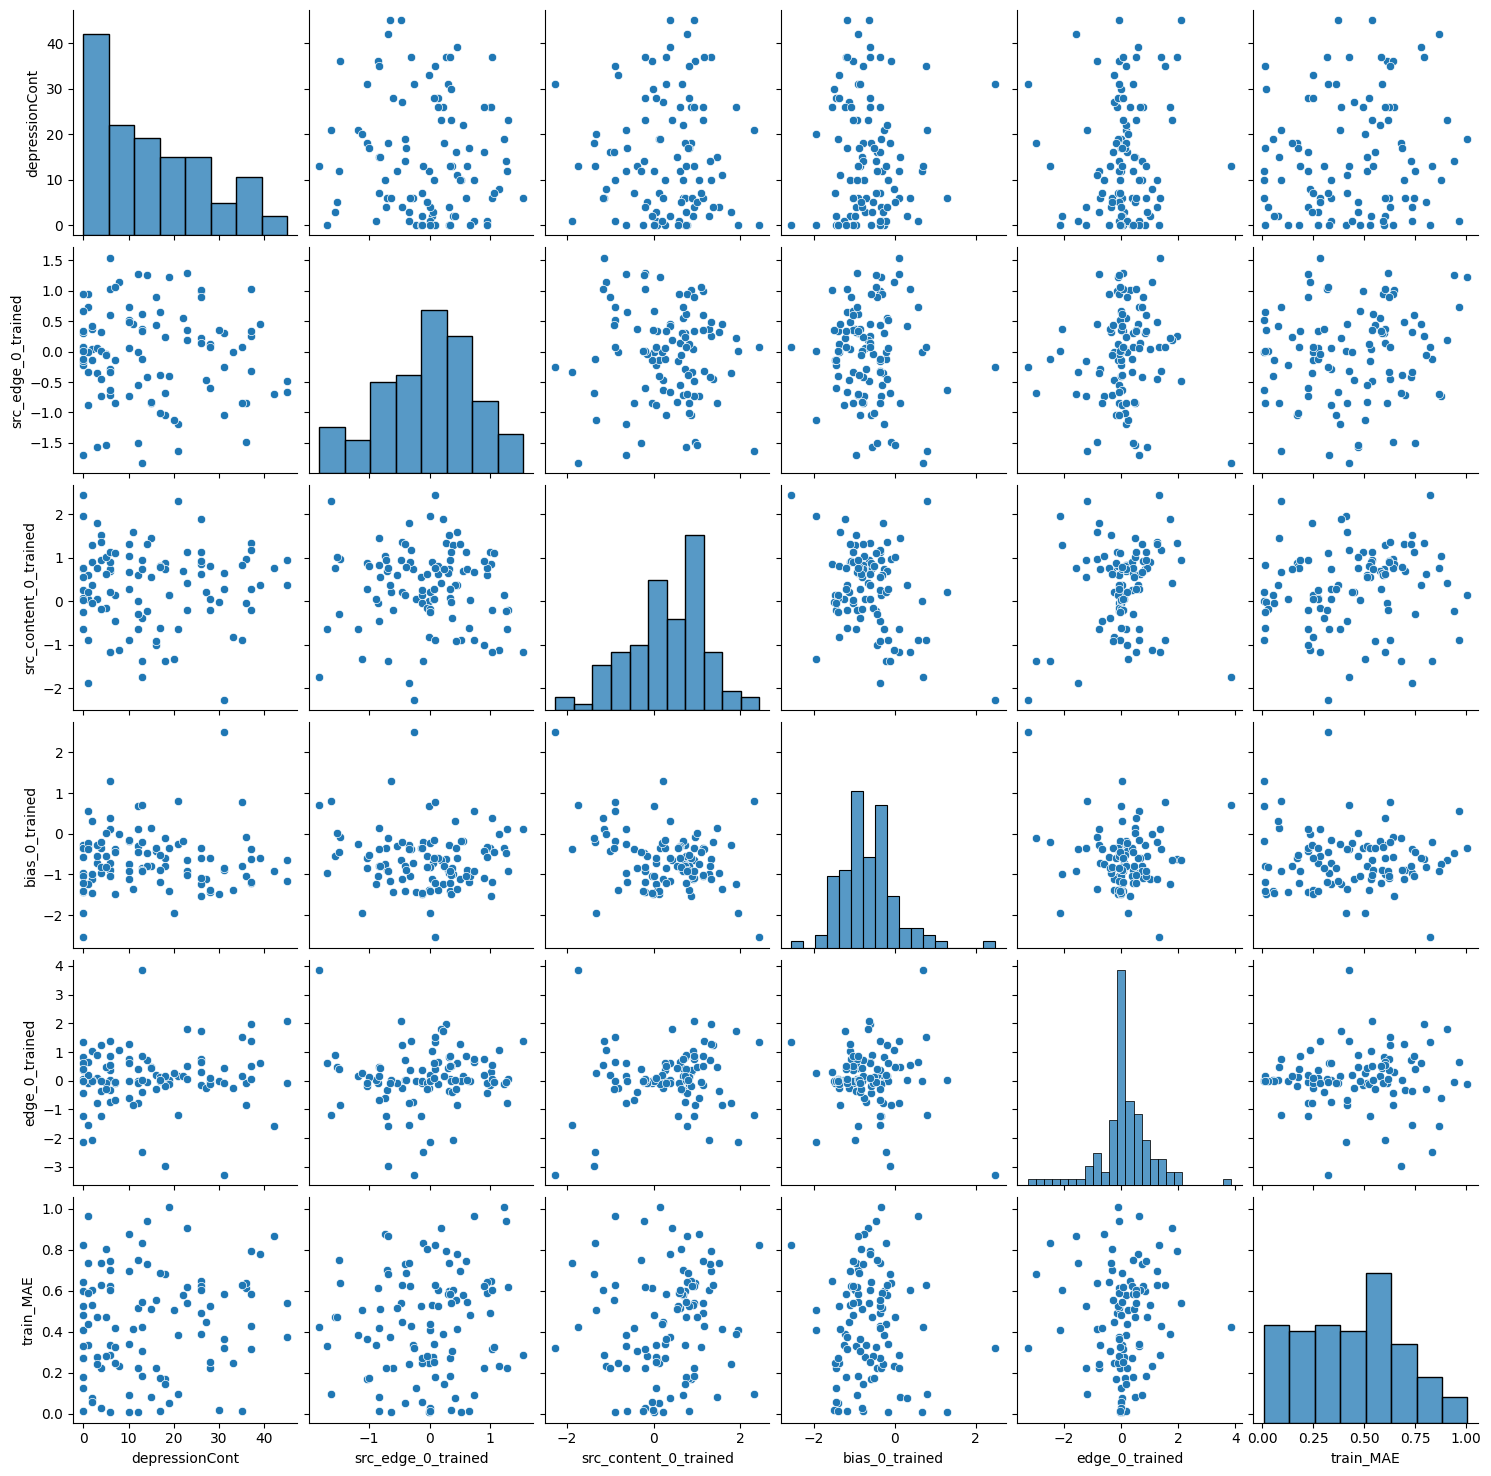

In [77]:
sns.pairplot(data[["depressionCont","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained","train_MAE"]])

In [78]:
data[["depressionCont","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained"]].corr()

from scipy.stats import pearsonr, spearmanr

In [79]:
var_names = ["depressionCont","n_not_experienced","train_MAE","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained"]

corr = []
p_values = []
for v_name in var_names:
    r,p = pearsonr(data[var_names].values,data[[v_name]].values)
    corr.append(r)
    p_values.append(p)

text = np.round(corr,3).astype(str)
p_values = np.round(p_values,3).astype(str)

for i in range(text.shape[0]):
    for j in range(text.shape[1]):
        text[i,j] = text[i,j] + " - p:" + p_values[i,j]


fig = go.Figure(data=go.Heatmap(
                    z= corr,
                    x = var_names,
                    y = var_names,
                    text= text,
                    texttemplate="%{text}",
                    textfont={"size":20}))
fig.update
fig.show()

In [80]:
var_names = ["depression","depressionCont","n_not_experienced","train_MAE","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained"]
r,p = spearmanr(data[var_names])


text = np.round(r,3).astype(str)
p_values = np.round(p,3).astype(str)

for i in range(text.shape[0]):
    for j in range(text.shape[1]):
        text[i,j] = text[i,j] + " - p:" + p_values[i,j]

fig = go.Figure(data=go.Heatmap(
                    z=r,
                    x = var_names,
                    y = var_names,
                    text=text,
                    texttemplate="%{text}",
                    textfont={"size":20}))
fig.update
fig.show()

"2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val" doesn't show clear trend between depressionCont and any of src_edge_0_trained, src_content_0_trained, bias_0_trained and edge_trained. There may be one with src_edge_0_trained (spearman = -0.0876, p = 0.0672; pearson = -0.0875, p = 0.0964). Some correlations appears between src_content_0_trained, edge_0_trained and bias_0_trained. This argues for removing some parameters - maybe one by one - maybe src_content_0_trained which is "correlating" the most.

Alternatively, dimensionality reduction applied to src_edge_0_trained, src_content_0_trained, bias_0_trained and edge_traine before classification could help.

In [81]:
data

,depression,depressionCont,female,age,n_not_experienced,participant_id,model.device,model.n_free_params,model.update_node_module.name,model.update_node_module.parameters.add_self_loops,...,src_edge_0_trained,full_src_edge_0_trained,dst_content_0_trained,att_dst_edge_0_trained,dst_edge_0_trained,full_dst_edge_0_trained,att_edge_0_trained,edge_0_trained,full_edge_0_trained,bias_0_trained
0,1,37,0,32,4,88,cuda,4,MyGATConv,False,...,0.263365,0.263365,NaN,1.0,NaN,NaN,1.0,1.967580,1.967580,-0.608210
1,1,15,0,39,2,50,cuda,4,MyGATConv,False,...,-0.841104,-0.841104,NaN,1.0,NaN,NaN,1.0,0.491972,0.491972,0.140942
2,1,45,1,31,12,49,cuda,4,MyGATConv,False,...,-0.481252,-0.481252,NaN,1.0,NaN,NaN,1.0,2.082179,2.082179,-0.637914
3,1,21,0,27,4,35,cuda,4,MyGATConv,False,...,-1.187043,-1.187043,NaN,1.0,NaN,NaN,1.0,0.161951,0.161951,-0.250646
4,1,36,1,23,20,26,cuda,4,MyGATConv,False,...,-0.847369,-0.847369,NaN,1.0,NaN,NaN,1.0,-0.066702,-0.066702,-1.025425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,7,0,48,4,71,cuda,4,MyGATConv,False,...,1.059354,1.059354,NaN,1.0,NaN,NaN,1.0,-0.051511,-0.051511,-0.452064
100,0,12,1,29,9,1,cuda,4,MyGATConv,False,...,-1.503265,-1.503265,NaN,1.0,NaN,NaN,1.0,0.414384,0.414384,-0.445530
101,1,31,1,33,8,22,cuda,4,MyGATConv,False,...,-1.041984,-1.041984,NaN,1.0,NaN,NaN,1.0,-0.077730,-0.077730,-0.842899
102,1,42,1,39,9,25,cuda,4,MyGATConv,False,...,-0.697929,-0.697929,NaN,1.0,NaN,NaN,1.0,-1.586519,-1.586519,-0.902246


In [82]:
data.columns.tolist()

['depression',
 'depressionCont',
 'female',
 'age',
 'n_not_experienced',
 'participant_id',
 'model.device',
 'model.n_free_params',
 'model.update_node_module.name',
 'model.update_node_module.parameters.add_self_loops',
 'model.update_node_module.parameters.bias',
 'model.update_node_module.parameters.concat',
 'model.update_node_module.parameters.dropout',
 'model.update_node_module.parameters.dst_content_mask.0',
 'model.update_node_module.parameters.dst_content_require_grad',
 'model.update_node_module.parameters.dst_content_weight_initializer',
 'model.update_node_module.parameters.dst_edge_mask.0',
 'model.update_node_module.parameters.dst_edge_require_grad',
 'model.update_node_module.parameters.dst_edge_weight_initializer',
 'model.update_node_module.parameters.edge_dim',
 'model.update_node_module.parameters.edge_weight_initializer',
 'model.update_node_module.parameters.fill_value',
 'model.update_node_module.parameters.heads',
 'model.update_node_module.parameters.in_chan

In [83]:
data[data["participant_id"] == 1]

,depression,depressionCont,female,age,n_not_experienced,participant_id,model.device,model.n_free_params,model.update_node_module.name,model.update_node_module.parameters.add_self_loops,...,src_edge_0_trained,full_src_edge_0_trained,dst_content_0_trained,att_dst_edge_0_trained,dst_edge_0_trained,full_dst_edge_0_trained,att_edge_0_trained,edge_0_trained,full_edge_0_trained,bias_0_trained
100,0,12,1,29,9,1,cuda,4,MyGATConv,False,...,-1.503265,-1.503265,NaN,1.0,NaN,NaN,1.0,0.414384,0.414384,-0.44553


In [84]:
results = smf.ols("depressionCont ~  center(train_MAE) * center(n_not_experienced) *  center(edge_0_trained) * center(bias_0_trained) * center(src_content_0_trained) * center(src_edge_0_trained)", data=data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:         depressionCont   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     1.566
Date:                Sun, 06 Jul 2025   Prob (F-statistic):             0.0656
Time:                        18:16:07   Log-Likelihood:                -345.70
No. Observations:                 104   AIC:                             819.4
Df Residuals:                      40   BIC:                             988.6
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                         coef    std err          t     

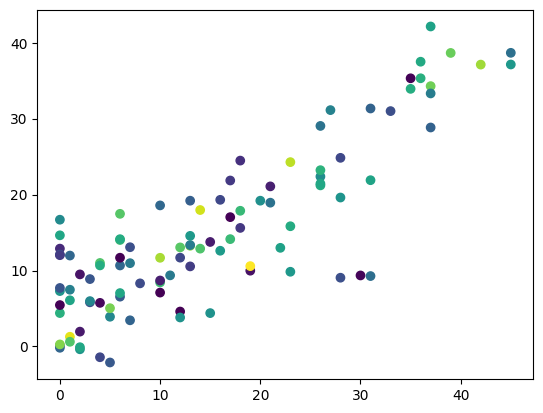

In [85]:
y_pred = results.predict(exog = data)
y_true = data["depressionCont"]

plt.scatter(y_true,y_pred,c=data["train_MAE"])

In [86]:
original_radius = (data[["src_content_0_trained","edge_0_trained"]]**2).sum(axis=1).pow(1/2)

epsilon = 0.1

new_radius = 2 * epsilon * (data["depressionCont"] - 1) / (data["depressionCont"].max() - data["depressionCont"].min()) + (1 + epsilon)
_data = data.copy()
_data["new_src_content_0_trained"] = _data["src_content_0_trained"]
_data["new_edge_0_trained"] = _data["edge_0_trained"]

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = _data["new_src_content_0_trained"],
        y = _data["new_edge_0_trained"],
        mode = "markers",
        marker = {
            "color": _data["depressionCont"],
            "colorbar": dict(
                title=dict(text="depressionCont")
            ),
            "colorscale": "Viridis"
        },
    )
)
fig.update_layout(
    width=600, height=400,
    xaxis_title="src_content_0_trained",
    yaxis_title = "edge_0_trained"
)
fig.show()

In [87]:
original_radius = (data[["src_edge_0_trained","edge_0_trained"]]**2).sum(axis=1).pow(1/2)

epsilon = 0.1

new_radius = 2 * epsilon * (data["depressionCont"] - 1) / (data["depressionCont"].max() - data["depressionCont"].min()) + (1 + epsilon)
_data = data.copy()
_data["new_src_edge_0_trained"] = _data["src_edge_0_trained"]*new_radius/original_radius
_data["new_edge_0_trained"] = _data["edge_0_trained"]*new_radius/original_radius

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x = _data["new_src_edge_0_trained"],
        y = _data["new_edge_0_trained"],
        mode = "markers",
        marker = {
            "color": _data["depressionCont"],
            "colorbar": dict(
                title=dict(text="depressionCont")
            ),
            "colorscale": "Viridis"
        },
        
    )
)
fig.update_layout(
    width=450, height=400,
    xaxis_title="src_edge_0_trained",
    yaxis_title = "edge_0_trained"
)
fig.show()

"2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val" r2 = 0.187 with depressionCont ~ n_not_experienced * src_edge_0_trained * src_content_0_trained * edge_0_trained * bias_0_trained

src_content_0_trained                                                                       -7.5368      2.778     -2.713      0.007 

n_not_experienced:src_content_0_trained                                                      0.7426      0.312      2.378      0.018 

n_not_experienced:bias_0_trained                                                            -0.5171      0.263     -1.964      0.050 

The higher the bias the less likely depressed. The highest the src_content param, the less likely depressed.

The parameter n_not_experienced is a moderator. Hard to tell from this what happens when n_not_experienced increases. But we know that it correlates with depressionCont (spearman 0.18, pearson 0.274).



depressionCont ~ train_avg_MAE * n_not_experienced * src_edge_0_trained * src_content_0_trained * edge_0_trained * bias_0_trained

reaches r2 = 0.338

Likewise, train_avg_MAE should be studied as a moderator. This vouches for some structural equation modelling. Additionally check the best model for each participant so that train_avg_MAE is not required: just take the best model. 



June 27 
Same model... weird

"2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val" r2 = 0.712 with depressionCont ~ train_avg_MAE * n_not_experienced * src_edge_0_trained * src_content_0_trained * edge_0_trained * bias_0_trained

n_not_experienced:src_content_0_trained                                8.5898      3.912      2.196      0.034       0.683      16.496

only significant



depressionCont ~ n_not_experienced * src_edge_0_trained * src_content_0_trained * edge_0_trained * bias_0_trained

reaches r2 = 0.38

and nothing is significant









For model "2025-06-25_07-05__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True"

with formula: "depressionCont ~ train_MAE * n_not_experienced * src_content_0_trained * edge_0_trained"

R-squared:                       0.219

nothing significiant

if I keep the participants that are best fitted by that model, I reach "R-squared: 0.727" (and nothing significant). If in that case no parameter reaches significance, it may be because of the low number of samples (24, 17 depressed, 7 not depressed). If the R2 is so improved, it argues again that samples shouldn't be mixed when doing the statistical analysis because some samples may be ill-fitted.



Text(0, 0.5, 'Within Cluster Sum of Squares')

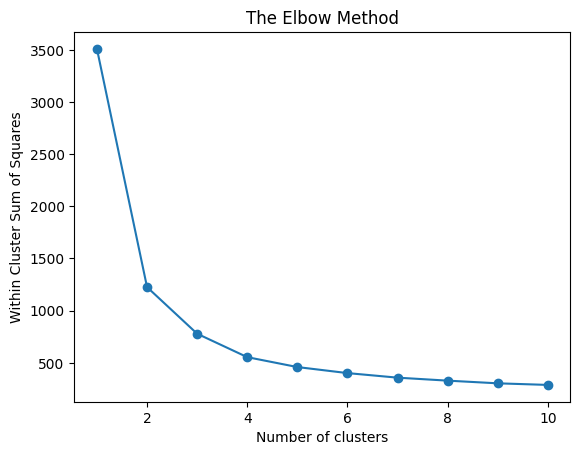

In [88]:

X = data[["n_not_experienced","train_MAE","src_edge_0_trained", "src_content_0_trained", "edge_0_trained", "bias_0_trained"]]
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km=kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,11),wcss, marker="o")

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

In [89]:
from sklearn.decomposition import PCA


#visualizing the 6 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(X)

# running Kmeans for 6 clusters on 2 PC's
kmeans_pca_2comp=KMeans(n_clusters=4)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp,data[["depression"]]], axis=1)

In [90]:
to_plot

,cluster_pred,Dimension 1,Dimension 2,depression
0,1,-5.3905,2.1788,1
1,1,-7.4160,0.8332,1
2,0,2.5968,1.8735,1
3,1,-5.4375,-0.4894,1
4,2,10.5841,-0.4604,1
...,...,...,...,...
99,1,-5.4226,0.4212,0
100,3,-0.4172,-0.1673,0
101,3,-1.4061,-0.1269,1
102,3,-0.3899,-1.0775,1


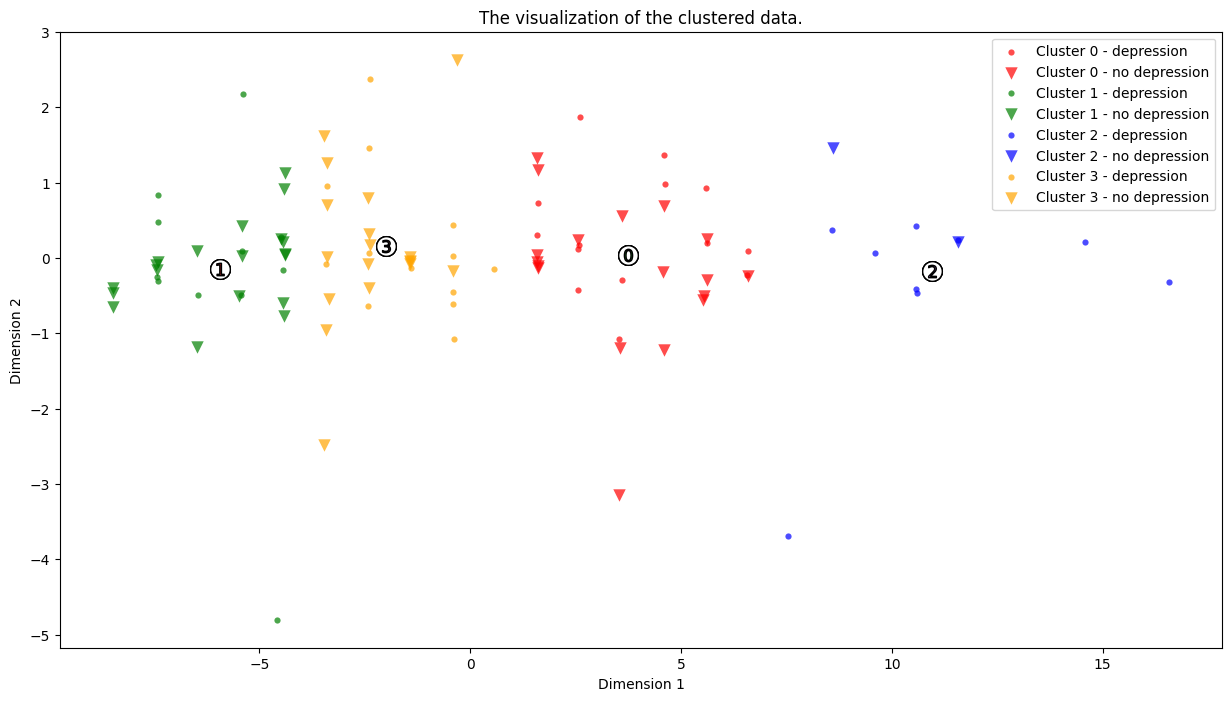

In [91]:
plt.figure(figsize=(15,8))
ax=plt.subplot()

colors=['red','green','blue','orange','yellow','purple']
n_clusters = 4
centers = centers_2comp
for n_clusters in range(n_clusters):
        
    # colors = cm.nipy_spectral((to_plot['Cluster_pred']== n_clusters).astype(float) / n_clusters)
        #colors=['red','green','blue','orange','yellow','purple']
    

    # not depression
    cluster_mask = to_plot['cluster_pred'] == n_clusters
    depression_mask  = to_plot['depression'] == 1
    ax.scatter(to_plot[cluster_mask*depression_mask]["Dimension 1"],to_plot[cluster_mask*depression_mask]["Dimension 2"],
        marker='.', 
        s=80, lw=0, alpha=0.7,
        c=colors[n_clusters], 
        edgecolor='black', 
        label='Cluster %d - depression'%n_clusters)

    ax.scatter(to_plot[cluster_mask*(~depression_mask)]["Dimension 1"],to_plot[cluster_mask*(~depression_mask)]["Dimension 2"],
        marker='v', 
        s=80, lw=0, alpha=0.7,
        c=colors[n_clusters], 
        edgecolor='black', 
        label='Cluster %d - no depression'%n_clusters)
            
    # Draw white circles at cluster centers
        

    for i, c in enumerate(centers):
           
        ax.scatter(c[0], c[1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=80, edgecolor='k')

ax.set_title("The visualization of the clustered data.")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")

plt.legend()    
plt.show()

[0.91789227 0.0314208  0.02348326 0.01696308 0.01024059]


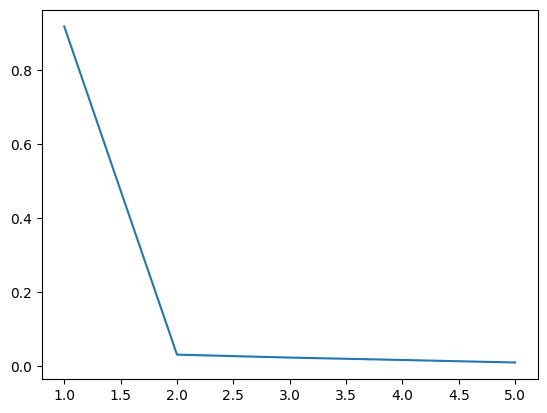

In [92]:
param_names = ["src_edge_0_trained", "src_content_0_trained", "edge_0_trained", "bias_0_trained", "n_not_experienced"]

pca = PCA(n_components=len(param_names), svd_solver='full')
pca.fit(data[param_names])
print(pca.explained_variance_ratio_)
plt.plot(np.arange(1,len(param_names)+1),pca.explained_variance_ratio_)

In [93]:
pca = PCA(n_components=5, svd_solver='full')
pca.fit(data[param_names])
print(pca.explained_variance_ratio_)
new_X = pca.transform(data[param_names])
new_X = pd.DataFrame(new_X,columns=[f"dim_{i}" for i in range(new_X.shape[-1])])
new_data = new_X.copy()
new_data["depressionCont"] = data["depressionCont"].copy()
new_data["n_not_experienced"] = data["n_not_experienced"].copy()

results = smf.ols("depressionCont ~ dim_0 * dim_1 * dim_2 * dim_3 * dim_4", data=new_data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

[0.91789227 0.0314208  0.02348326 0.01696308 0.01024059]
== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:         depressionCont   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     1.440
Date:                Sun, 06 Jul 2025   Prob (F-statistic):              0.104
Time:                        18:16:08   Log-Likelihood:                -385.27
No. Observations:                 104   AIC:                             834.5
Df Residuals:                      72   BIC:                             919.2
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

"2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val" r2 = 0.199 with depressionCont ~ n_not_experienced * dim_0 * dim_1 * dim_2 * dim_3

a bit of improvement but no dimension reduction... Maybe because PCA decorrelate the variables.

## Model Visualization (PDP, ICE...)

In [376]:
import sklearn.linear_model as linear_model 
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.inspection import PartialDependenceDisplay

from sklearn.model_selection import train_test_split

X = data[["train_MAE","n_not_experienced","edge_0_trained","bias_0_trained","src_content_0_trained", "src_edge_0_trained"]]

y = data[["depressionCont"]]

poly = PolynomialFeatures(2,include_bias=False,interaction_only=True)
aug_X = poly.fit_transform(X)
print(aug_X.shape)
#print(poly.get_feature_names_out(poly.feature_names_in_))

reg = linear_model.ElasticNet().fit(aug_X, y)
print(reg.score(aug_X, y))
print(reg.coef_, reg.intercept_)

model = linear_model.ElasticNet()
print(cross_val_score(model, aug_X, y, cv=5,scoring="r2")) #neg_mean_absolute_error

(104, 21)
0.14037648337372255
[ 0.          0.41617043  0.          0.5124665   0.         -0.10259468
  0.          0.          0.          0.         -0.          0.16906243
 -0.29314935 -0.22122625 -0.01140047 -0.61908333  0.4400096   0.28740403
  0.         -0.00284221 -0.15581345] [9.67060497]
[ 0.03667381 -0.18174805  0.09663455 -0.65380489 -0.25263522]


(83, 21) (83, 1)
(21, 21) (21, 1)
0.30600304677892176
-0.72654754704617


/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



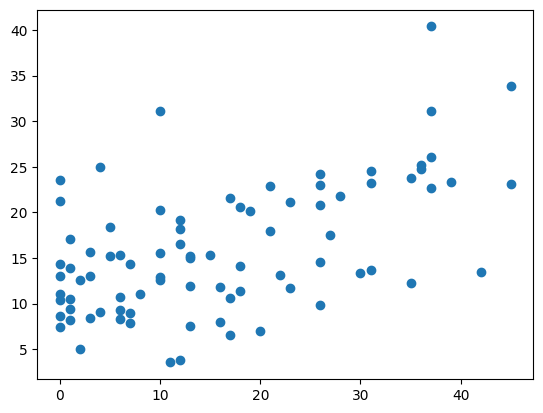

/home/julien-rsbrg/venv/venv_semantic_to_liking/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



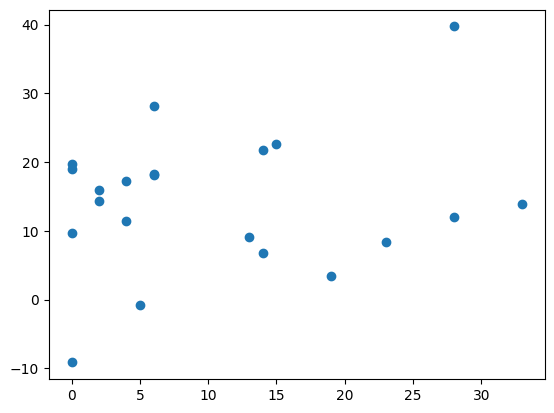

In [390]:
X_train, X_test, y_train, y_test = train_test_split(
    aug_X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

model = linear_model.LinearRegression().fit(
    pd.DataFrame(X_train,columns=poly.get_feature_names_out(input_features=poly.feature_names_in_)), 
    y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

plt.scatter(y_train,model.predict(X_train))
plt.show()

plt.scatter(y_test,model.predict(X_test))
plt.show()

Computing partial dependence plots and individual conditional expectation...


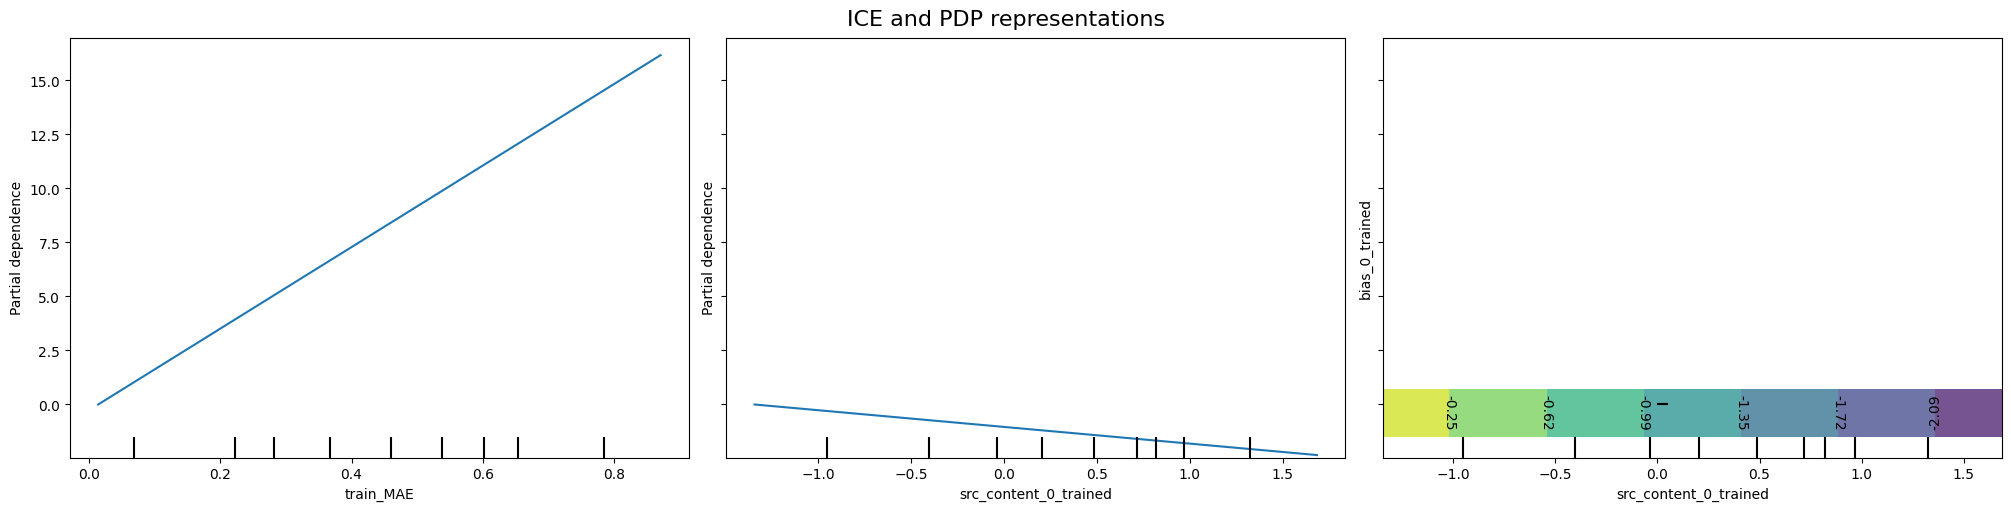

In [380]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(ncols=3, figsize=(20, 5), sharey=True, constrained_layout=True)

features_info = {
    "features": ["train_MAE","src_content_0_trained",("src_content_0_trained","bias_0_trained")],
    "kind": "average",
    "centered": True,
}

common_params = {
    "subsample": 50,
    "n_jobs": 6,
    "grid_resolution": 20,
    "random_state": 0,
}


display = PartialDependenceDisplay.from_estimator(
    model,
    pd.DataFrame(X_train,columns=poly.get_feature_names_out(input_features=poly.feature_names_in_)),
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle("ICE and PDP representations", fontsize=16)

Computing partial dependence plots and individual conditional expectation...


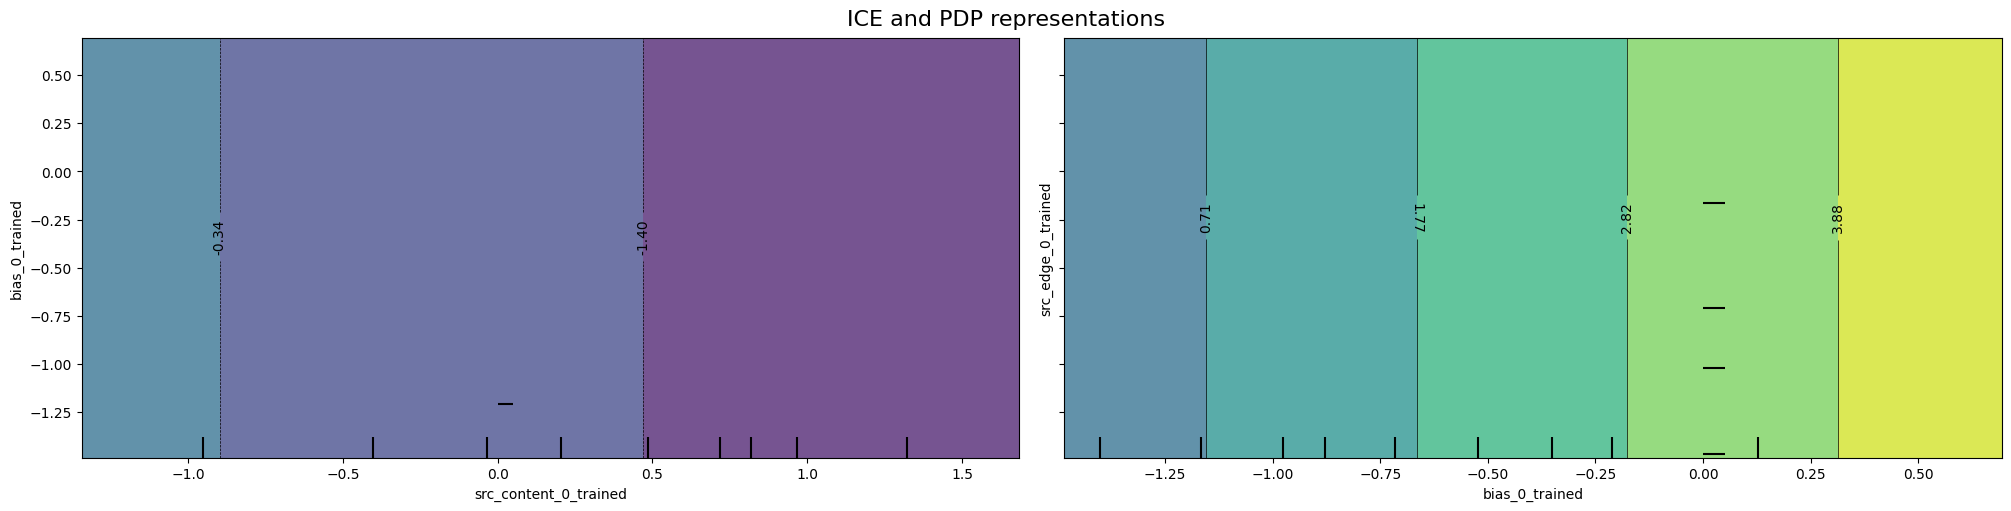

In [381]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(ncols=2, figsize=(20, 5), sharey=True, constrained_layout=True)

features_info = {
    "features": [("src_content_0_trained","bias_0_trained"),("bias_0_trained","src_edge_0_trained")],
    "kind": "average",
    "centered": True,
}

display = PartialDependenceDisplay.from_estimator(
    model,
    pd.DataFrame(X_train,columns=poly.get_feature_names_out(input_features=poly.feature_names_in_)),
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle("ICE and PDP representations", fontsize=16)

Computing partial dependence plots and individual conditional expectation...


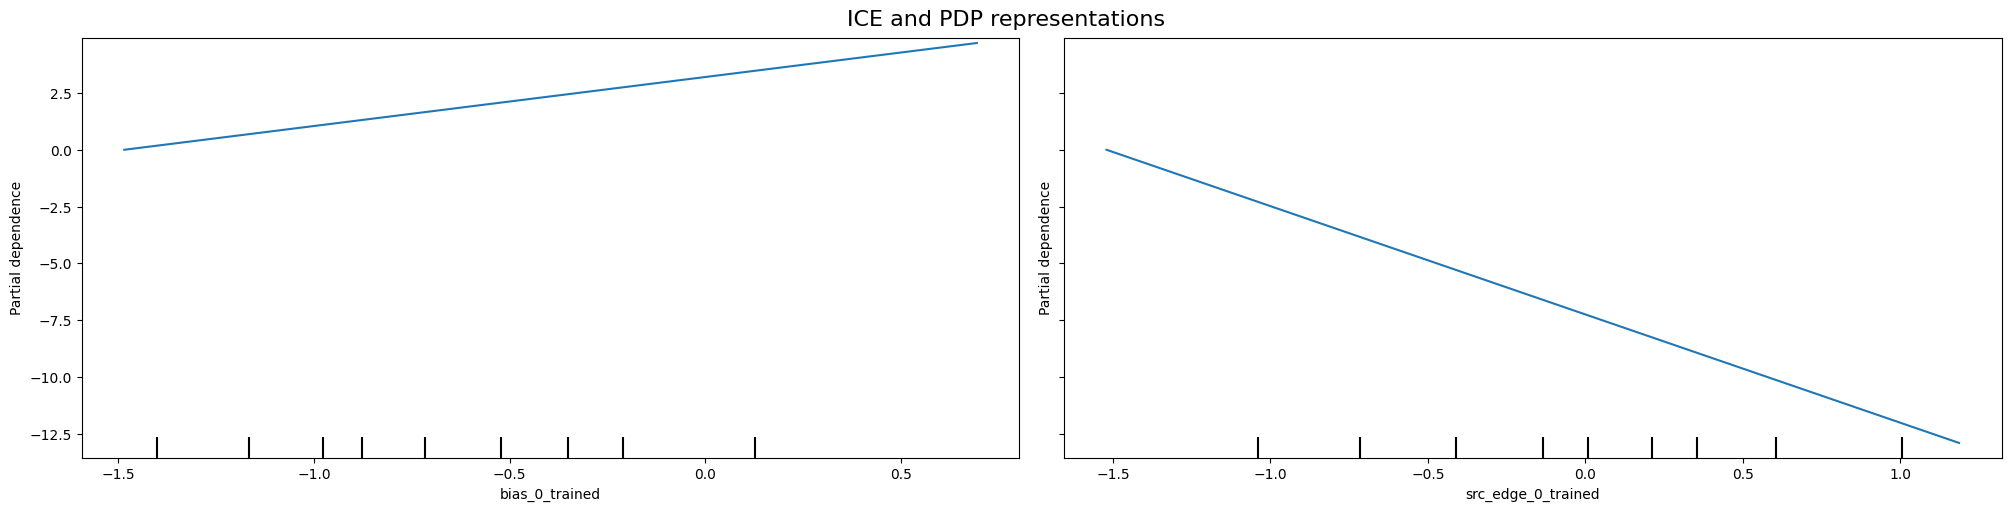

In [382]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(ncols=2, figsize=(20, 5), sharey=True, constrained_layout=True)

features_info = {
    "features": ["bias_0_trained","src_edge_0_trained"],
    "kind": "average",
    "centered": True,
}

display = PartialDependenceDisplay.from_estimator(
    model,
    pd.DataFrame(X_train,columns=poly.get_feature_names_out(input_features=poly.feature_names_in_)),
    **features_info,
    ax=ax,
    **common_params,
)
_ = display.figure_.suptitle("ICE and PDP representations", fontsize=16)

## Spectral clustering

In [95]:
from sklearn.cluster import SpectralClustering
import numpy as np
X = np.array([[1, 1], [2, 1], [1, 0],
              [4, 7], [3, 5], [3, 6]])
clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit(X)
print(clustering.labels_)
print(clustering)

[1 1 1 0 0 0]
SpectralClustering(assign_labels='discretize', n_clusters=2, random_state=0)


In [96]:
X = data[["n_not_experienced","src_content_0_trained","src_edge_0_trained","edge_0_trained","bias_0_trained"]]

clustering = SpectralClustering(n_clusters=2,
        assign_labels='discretize',
        random_state=0).fit(X)
print(clustering.labels_)

[0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]


In [97]:
from sklearn import metrics

metrics.adjusted_rand_score(clustering.labels_,data["depression"].values)

0.03570792294110119

In [98]:
data["depression"]

0      1
1      1
2      1
3      1
4      1
      ..
99     0
100    0
101    1
102    1
103    1
Name: depression, Length: 104, dtype: int64

## other

In [99]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3],
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 3],
      hovercolor=["midnightblue", "lightskyblue", "gold", "mediumturquoise", "lightgreen", "cyan"],
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

# t-tests

In [100]:
import scipy.stats

depression_mask = data["depression"] == 1

depressed individuals are liking less unexperienced activities by default 
(ie, $\beta_0$ depressed < $\beta_0$ not depressed)

In [101]:
scipy.stats.ttest_ind(data[depression_mask]["bias_0_trained"], data[~depression_mask]["bias_0_trained"], equal_var=False, alternative="less")

TtestResult(statistic=-0.5627210568892693, pvalue=0.287470182426123, df=95.72715365124164)

depressed individuals have a narrower in depth generalization 
(ie, $\beta_l$ depressed < $\beta_l$ not depressed)  

In [102]:
scipy.stats.ttest_ind(data[depression_mask]["src_content_0_trained"], data[~depression_mask]["src_content_0_trained"], equal_var=False, alternative="less")

TtestResult(statistic=0.041297537663568945, pvalue=0.5164290861191385, df=99.04927602521605)

depressed individuals have a focused attention to unliked activities 
(ie, $\beta_el$ depressed < 0) (after normalizing the liking and centering around 50) which is not 

In [103]:
_data = data.copy()
_data["null_src_edge_0_trained"] = 0.0

scipy.stats.ttest_ind(data[depression_mask]["src_edge_0_trained"], _data[depression_mask]["null_src_edge_0_trained"], equal_var=False, alternative="less")

TtestResult(statistic=-0.732793018019748, pvalue=0.2337012695736042, df=46.0)

In [104]:
_data = data.copy()
_data["null_src_edge_0_trained"] = 0.0
scipy.stats.ttest_ind(data[~depression_mask]["src_edge_0_trained"], _data[~depression_mask]["null_src_edge_0_trained"], equal_var=False, alternative="two-sided")

TtestResult(statistic=-0.05985941239121982, pvalue=0.9524807169046431, df=56.0)

In [105]:
# exploratory: but more likely to not be null that not depressed individuals
scipy.stats.ttest_ind(data[depression_mask]["src_edge_0_trained"], _data[depression_mask]["null_src_edge_0_trained"], equal_var=False, alternative="two-sided")

TtestResult(statistic=-0.732793018019748, pvalue=0.4674025391472084, df=46.0)

In [106]:
# exploratory: but more likely to not be less than not depressed individuals
scipy.stats.ttest_ind(data[depression_mask]["src_edge_0_trained"], data[~depression_mask]["src_edge_0_trained"], equal_var=False, alternative="less")

TtestResult(statistic=-0.5117268057815736, pvalue=0.3050035302789734, df=96.84893162541552)

depressed individuals have a focused attention to similar activities compared to not depressed individuals 

In [107]:
scipy.stats.ttest_ind(data[depression_mask]["edge_0_trained"], data[~depression_mask]["edge_0_trained"], equal_var=False, alternative="less")

TtestResult(statistic=0.38393386743258007, pvalue=0.649068933834116, df=97.65565646471906)

# Next steps

Hyp:

0 - underestimation: low bias x depression

1 - narrow generalization in depth (vertical) (neg src_content x depression)

2 - narrow generalization across (horizontal) (use of high edge_0_trained x depression = stick to similar, and high src_edge_0_trained -x depression = attention to negative stimuli)

## "2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val" 

Some preliminary results for src_content_0_trained (hyp 1) and bias_0_trained (hyp 0). Both negative, which foster India's first hypothesis.

There is no use for edge_0_trained and src_edge_0_trained... This contradict hypothesis 2... It may not work for edge_0_trained because similarity is already low predictor of liking AND the graph structure is already constrained by similarity. Increasing the number of connections in the graph may change that pattern for both parameters.

- (TODO): Do without leap and only 1st degree 

- (TODO): Increase number of connections not exp to exp

It may not work for src_edge_0_trained because the other parameters are already doing the work... See without it.

- TODO: n_not_experienced is used as moderator... Do a full mediation x moderation analysis to check the underlying structure

depression => +n_not_experienced => +bias vs depression, (n_not_experienced) => +bias

CAREFUL: even for those parameters, should check whether I can retrieve them on a same participant_graph from new initializations .

- TODO: There are a lot of correlations between parameters. This is unwanted because it shows overidentification (two params that counteract / thwart each other). TODO: factor design to see which parameters are more essential.

PCA didn't contradict the use of those 4 though.


train_avg_MAE correlates with train_avg_MAE "2025-06-07_15-31__GAT_LR-1.0_bias-True_att-liking-True_amp-liking-True_diss-liking-False_liking2d-False" - (pearson 0.849 p<1e-3; spearman 0.856 p<1e-3)

On average train_avg_MAE is improved of 0.051 compared to "2025-06-07_15-31__GAT_LR-1.0_bias-True_att-liking-True_amp-liking-True_diss-liking-False_liking2d-False"


- TODO: check BIC (well same number of params)

- TODO: train_avg_MAE as moderator + the fact that it increases the prediction of depressionCont may insist that for some participants that model is not good at all and those participants should be removed from the analysis.

- TODO: check per participant which is the best model + detect outliers (come together because if baseline work, it's that they don't do anything and should be removed...) This will also clean the regression analysis.


## Next model